In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

(0.0, 20.0, 0.0, 20.0)

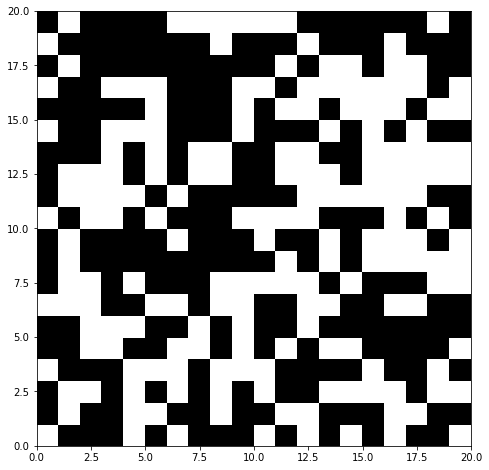

In [2]:
cellLength = 20
simulationSteps = 1000000
couplingConstant = 1.0 ## J
temperature = 1.0

def calculateEnergy(spinArray):
    '''Calculate all the pairwise energy interactions and sum them up
    Do rows and columns separately and add them up.'''
    
    rowNeighborInteractionEnergy = np.sum(spinArray[0:cellLength-1,:]*spinArray[1:cellLength,:])
    columnNeighborInteractionEnergy = np.sum(spinArray[:,0:cellLength-1]*spinArray[:,1:cellLength])
    
    totalInteractionEnergy = rowNeighborInteractionEnergy+columnNeighborInteractionEnergy
    
    return -couplingConstant*totalInteractionEnergy

## Create an empty square array
spinArray = np.empty([cellLength,cellLength], int)

## Populate it with random spins
for row in range(cellLength):
    for column in range(cellLength):
        if random.random()<0.5:
            spinArray[row,column] = +1
        else:
            spinArray[row,column] = -1

# Calculate the initial energy and magnetization        
energyAtStep = calculateEnergy(spinArray)
magnetizationAtStep = np.sum(spinArray)

## Show the spin array 
## Black is spin up and white is spin down
plt.figure(figsize=(8,8))
c = plt.pcolor(spinArray, cmap='Greys')
plt.axis('square')

In [3]:
## Hold onto the values of the magnetization 
## for each step in the simulation
magnetizationArray = np.zeros(simulationSteps)

## Monte Carlo Loop
for step in range(simulationSteps):
    
    ## Store the magnetization at this step
    magnetizationArray[step] = magnetizationAtStep
    
    ## Store the energy before swapping the spin randomly
    oldEnergy = energyAtStep
    
    ## Select a spin from the cell
    ithSpin = random.randrange(cellLength)
    jthSpin = random.randrange(cellLength)
    
    ## Flip the spin of that one site
    spinArray[ithSpin,jthSpin] = -spinArray[ithSpin,jthSpin]
    
    ## Calculate the energy after that change
    energyAtStep = calculateEnergy(spinArray)
    deltaE = energyAtStep - oldEnergy
    
    ## If the change resulted in an increase in the total energy,
    ## evaluate whether to accept the value or not
    if deltaE > 0.0:
        
        probabilityOfFlip = np.exp(-deltaE/temperature)
        
        ## If the the random value is lower than the probability,
        ## reverse the change to the spin, and recalculate the energy
        if random.random()>probabilityOfFlip:
            
            spinArray[ithSpin,jthSpin] = -spinArray[ithSpin,jthSpin]
            energyAtStep = oldEnergy
            continue
        
    magnetizationAtStep = np.sum(spinArray)

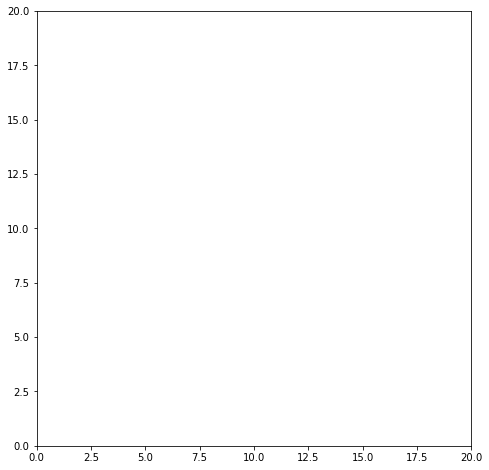

In [4]:
plt.figure(figsize=(8,8));
c = plt.pcolor(spinArray, cmap='Greys');
plt.axis('square');

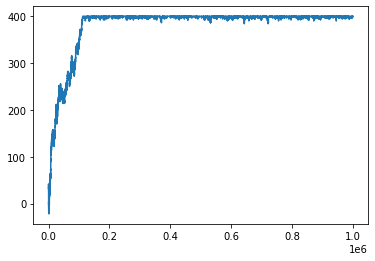

In [5]:
plt.plot(magnetizationArray)